### Table Content
---------------------

- [Summary](#summary)
- [Import libraries and packages](#libs)
- [Import Reliance dataset](#dataset)
    - [Rename columns name](#cname)
- [Preprocessing data](#predata)
    - [Checking Null/NA value and remove it](#nullna)
    - [Checking columns datatype](#coldt)
    - [Converting Date column from string to datetime format](#dateformat)
    - [Sorting dataset by Date](#sortdate)
- [Exploratory Data Analysis - EDA](#eda)
    - [Get total duration](#duration)
    - [Monthwise comparision between Stock actual, open and close price with chart](#month_op_close)
    - [Monthwise High and Low stock price with chart](#month_high_low)
    - [Trend comparision between stock price, open price, close price, high price, low price with chart](#trend) 
- [Close price prediction preparation and preprocessing](#closepred)
    - [Make separate dataframe with close price](#sepclose)
    - [Plotting stock close price chart](#plotclose)
    - [Normalizing/scaling close values between 0 to 1](#norm)
    - [Split data for training and testing](#splitdata)
- [Prepared data for according to time-series-prediction](#tsp)
- [Algorithms](#algo)
    - [Super vector regressor - SVR](#svr)
        - [RMSE, MSE and MAE](#svrevalmat)
        - [Explained variance regression score](#svrevariance)
        - [R<sup>2</sup> score for regression](#svrrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#svrrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#svrcomparechart)
        - [Predicting next 10 days](#svrpred10)
        - [Plotting last 15 days and next predicted 10 days](#svrlast25)
        - [Plotting whole closing stock price with next 10 days prediction](#svrwholepred)
    - [Random Forest Regressor - RF](#rf)
        - [RMSE, MSE and MAE](#rfevalmat)
        - [Explained variance regression score](#rfevariance)
        - [R<sup>2</sup> score for regression](#rfrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#rfrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#rfcomparechart)
        - [Predicting next 10 days](#rfpred10)
        - [Plotting last 15 days and next predicted 10 days](#rflast25)
        - [Plotting whole closing stock price with next 10 days prediction](#rfwholepred)
    - [K-nearest neighbour - KNN](#knn)
        - [RMSE, MSE and MAE](#knnevalmat)
        - [Explained variance regression score](#knnevariance)
        - [R<sup>2</sup> score for regression](#knnrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#knnrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#knncomparechart)
        - [Predicting next 10 days](#knnpred10)
        - [Plotting last 15 days and next predicted 10 days](#knnlast25)
        - [Plotting whole closing stock price with next 10 days prediction](#knnwholepred)
    - [LSTM](#lstm)
        - [RMSE, MSE and MAE](#lstmevalmat)
        - [Explained variance regression score](#lstmevariance)
        - [R<sup>2</sup> score for regression](#lstmrsquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#lstmrloss)
        - [Comparision between original stock close price vs predicted close price with chart](#lstmcomparechart)
        - [Predicting next 10 days](#lstmpred10)
        - [Plotting last 15 days and next predicted 10 days](#lstmlast25)
        - [Plotting whole closing stock price with next 10 days prediction](#lstmwholepred)
    - [GRU](#gru)
        - [RMSE, MSE and MAE](#gruevalmat)
        - [Explained variance regression score](#gruevariance)
        - [R<sup>2</sup> score for regression](#grursquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#grurloss)
        - [Comparision between original stock close price vs predicted close price with chart](#grucomparechart)
        - [Predicting next 10 days](#grupred10)
        - [Plotting last 15 days and next predicted 10 days](#grulast25)
        - [Plotting whole closing stock price with next 10 days prediction](#gruwholepred)
    - [LSTM + GRU](#lstm_gru)
        - [RMSE, MSE and MAE](#lstm_gruevalmat)
        - [Explained variance regression score](#lstm_gruevariance)
        - [R<sup>2</sup> score for regression](#lstm_grursquare)
        - [Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)](#lstm_grurloss)
        - [Comparision between original stock close price vs predicted close price with chart](#lstm_grucomparechart)
        - [Predicting next 10 days](#lstm_grupred10)
        - [Plotting last 15 days and next predicted 10 days](#lstm_grulast25)
        - [Plotting whole closing stock price with next 10 days prediction](#lstm_gruwholepred)
- [Conclusion](#conclusion)
    - [Plotting final chart with all algorithms and compare prediction to each others](#finalchart)

<a name="summary"></a>
### Summary

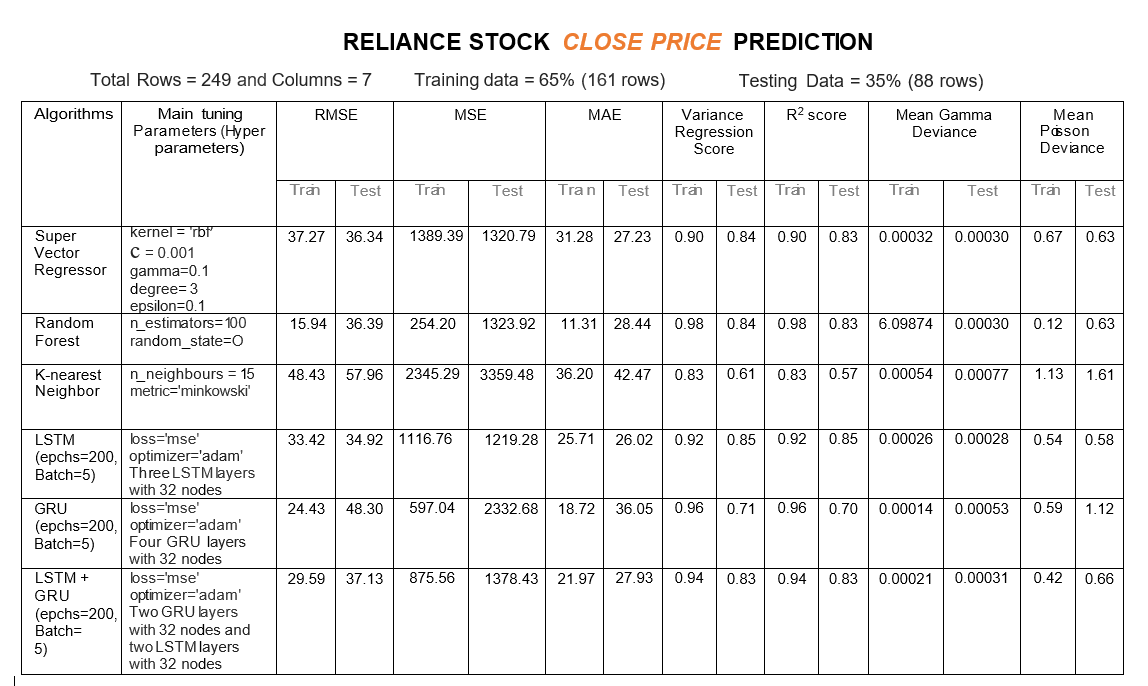 

<a name="libs"></a>
### Import libraries and packages

In [1]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


<a name="dataset"></a>
### Import dataset 

In [2]:
# Import dataset
bist100 = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\Work\Projects\Minor-Stock Prediction System\RELIANCE.csv')
bist100.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="cname"></a>
### Rename columns

In [3]:
# Rename columns
bist100.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="predata"></a>

### Preprocessing Data

<a name="nullna"></a>
### Checking null and na value

In [4]:
# Checking null value
bist100.isnull().sum()

date         0
open         1
high         1
low          1
close        1
Adj Close    1
Volume       1
dtype: int64

In [5]:
# Checking na value
bist100.isna().any()

date         False
open          True
high          True
low           True
close         True
Adj Close     True
Volume        True
dtype: bool

In [6]:
bist100.dropna(inplace=True)
bist100.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

<a name="coldt"></a>

### Checking datatype of each column

In [7]:
# Checking Data type of each column
print("Date column data type: ", type(bist100['date'][0]))
print("Open column data type: ", type(bist100['open'][0]))
print("Close column data type: ", type(bist100['close'][0]))
print("High column data type: ", type(bist100['high'][0]))
print("Low column data type: ", type(bist100['low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


<a name="dateformat"></a>

### Convert date from string to date format

In [8]:
# convert date field from string to Date format and make it index
bist100['date'] = pd.to_datetime(bist100.date)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


<a name="sortdate"></a>

### Sorting dataset by date format

In [9]:
bist100.sort_values(by='date', inplace=True)
bist100.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-08-19,2141.000000,2154.000000,2121.350098,2131.550049,2124.715088,15731396.0
1,2020-08-20,2120.000000,2123.899902,2088.000000,2097.050049,2090.325684,10401212.0
2,2020-08-21,2118.000000,2122.000000,2077.000000,2081.850098,2075.174316,11667129.0
3,2020-08-24,2091.399902,2104.500000,2070.500000,2095.750000,2089.029785,15098991.0
4,2020-08-25,2106.000000,2111.300049,2078.000000,2082.100098,2075.423584,8947563.0


In [10]:
bist100.shape

(249, 7)

<a name="eda"></a>

### EDA - Exploratory Data Analysis

<a name="duration"></a>

### Get the duration of dataset

In [11]:
print("Starting date: ",bist100.iloc[0][0])
print("Ending date: ", bist100.iloc[-1][0])
print("Duration: ", bist100.iloc[-1][0]-bist100.iloc[0][0])

Starting date:  2020-08-19 00:00:00
Ending date:  2021-08-18 00:00:00
Duration:  364 days 00:00:00


<a name="month_op_close"></a>

### Monthwise comparision between Stock actual, open and close price

In [12]:
monthvise= bist100.groupby(bist100['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
January,1968.000006,1957.662494
April,1963.384207,1961.278956
November,1985.213160,1964.847367
May,1967.050006,1972.582513
December,1980.765897,1978.338645


In [13]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

<a name="month_high_low"></a>

### Monthwise High and Low stock price 

In [14]:
bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

date
April        1876.699951
August       2041.150024
December     1855.250000
February     1848.000000
January      1830.000000
July         2016.250000
June         2081.000000
March        1973.699951
May          1906.000000
November     1835.099976
October      1991.000000
September    2044.250000
Name: low, dtype: float64

In [15]:
monthvise_high= bist100.groupby(bist100['date'].dt.strftime('%B'))['high'].max()
monthvise_low= bist100.groupby(bist100['date'].dt.strftime('%B'))['low'].min()

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

<a name="trend"></a>

### Trend comparision between stock price, open price, close price, high price, low price

In [17]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(bist100, x=bist100.date, y=[bist100['open'], bist100['close'], 
                                          bist100['high'], bist100['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

<a name="closepred"></a>

### Close price prediction preparation and preprocessing

<a name="sepclose"></a>

### Make separate dataframe with close price

In [18]:
closedf = bist100[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (249, 2)


<a name="plotclose"></a>

### Plotting stock close price chart

In [19]:
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="norm"></a>

### Normalizing / scaling close value between 0 to 1

In [20]:
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(249, 1)


<a name="splitdata"></a>

### Split data for training and testing
Ratio for training and testing data is 65:35

In [21]:
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (161, 1)
test_data:  (88, 1)


<a name="tsp"></a>

### Create new dataset according to requirement of time-series prediction 

In [22]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (145, 15)
y_train:  (145,)
X_test:  (72, 15)
y_test (72,)


<a name="algo"></a>

### Algorithms

<a name="svr"></a>

### Super vector regression - SVR

In [24]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e2, gamma= 0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=100.0, gamma=0.1)

In [25]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [26]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="svrevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [27]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  37.274547976768964
Train data MSE:  1389.3919268724514
Test data MAE:  31.280231839874926
-------------------------------------------------------------------------------------
Test data RMSE:  36.34262554760639
Test data MSE:  1320.7864316935327
Test data MAE:  27.23447128706467


<a name="svrevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [28]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8999962750278557
Test data explained variance regression score: 0.8360527147132347


<a name="svrrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [29]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8999781217643342
Test data R2 score: 0.8323769822370476


<a name="svrrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [30]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.00032193241610047117
Test data MGD:  0.00030250240418864014
----------------------------------------------------------------------
Train data MPD:  0.6677033396020338
Test data MPD:  0.6317613148290522


<a name="svrcomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [31]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="svrpred10"></a>

#### Predicting next 10 days

In [32]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="svrlast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [33]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [34]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="svrwholepred"></a>

#### Plotting whole closing stock price with prediction

In [35]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="rf"></a>

### Random Forest Regressor - RF

In [36]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [37]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [38]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="rfevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [39]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  15.9436225836691
Train data MSE:  254.19910109048334
Test data MAE:  11.312237081999973
-------------------------------------------------------------------------------------
Test data RMSE:  36.38576945671656
Test data MSE:  1323.9242189573279
Test data MAE:  28.438943404861146


<a name="rfevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [40]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9817462170670307
Test data explained variance regression score: 0.8435140098480778


<a name="rfrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [41]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9817002884174509
Test data R2 score: 0.8319787608761716


<a name="rfrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [42]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  6.0987377333706894e-05
Test data MGD:  0.00030254592564378974
----------------------------------------------------------------------
Train data MPD:  0.12428448051730122
Test data MPD:  0.6325221309977691


<a name="rfcomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [43]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="rfpred10"></a>

#### Predicting next 10 days

In [44]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="rflast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [45]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [46]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="rfwholepred"></a>

#### Plotting whole closing stock price with prediction

In [47]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="knn"></a>

### K-nearest neighgbour - KNN

In [48]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [49]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)


Train data prediction: (145, 1)
Test data prediction: (72, 1)


In [50]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="knnevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [51]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  48.42820695568111
Train data MSE:  2345.29122894228
Test data MAE:  36.20233006390805
-------------------------------------------------------------------------------------
Test data RMSE:  57.96097828550756
Test data MSE:  3359.4750038130787
Test data MAE:  42.46897209444444


<a name="knnevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [52]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.8317721038210375
Test data explained variance regression score: 0.6143669254200261


<a name="knnrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [53]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8311632382545328
Test data R2 score: 0.573643910381252


<a name="knnrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [54]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0005449232319402665
Test data MGD:  0.0007682032694172398
----------------------------------------------------------------------
Train data MPD:  1.1287418591191642
Test data MPD:  1.6057989952963807


<a name="knncomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [55]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="knnpred10"></a>

#### Predicting next 10 days

In [56]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="knnlast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [57]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [58]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="knnwholepred"></a>

#### Plotting whole closing stock price with prediction

In [59]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm"></a>

### LSTM

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


<a name="lstmevalmat"></a>

#### LSTM model structure

In [61]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 6s 53ms/step - loss: 0.0672 - val_loss: 0.0364
Epoch 2/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0335 - val_loss: 0.0243
Epoch 3/200
29/29 [==============================] - 0s 12ms/step - loss: 0.0344 - val_loss: 0.0264
Epoch 4/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0336 - val_loss: 0.0216
Epoch 5/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0307 - val_loss: 0.0216
Epoch 6/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0310 - val_loss: 0.0203
Epoch 7/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0277 - val_loss: 0.0180
Epoch 8/200
29/29 [==============================] - 0s 14ms/step - loss: 0.0248 - val_loss: 0.0193
Epoch 9/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0251 - val_loss: 0.0184
Epoch 10/200
29/29 [==============================] - 0s 13ms/step - loss: 0.0244 - val_loss: 0.0187

In [64]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((145, 1), (72, 1))

In [65]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstmevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [66]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  35.969305902684134
Train data MSE:  1293.7909671208677
Test data MAE:  27.457884019234925
-------------------------------------------------------------------------------------
Test data RMSE:  39.4027285443811
Test data MSE:  1552.575016742185
Test data MAE:  32.8474714200304


<a name="lstmevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [67]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9195363491942341
Test data explained variance regression score: 0.8328352490492612


<a name="lstmrsquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [68]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.906860404128685
Test data R2 score: 0.8029603398666063


<a name="lstmrloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [69]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0003016173445041677
Test data MGD:  0.0003574972930944405
----------------------------------------------------------------------
Train data MPD:  0.6237884747829255
Test data MPD:  0.7443164539943976


<a name="lstmcomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [70]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="lstmpred10"></a>

#### Predicting next 10 days

In [71]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstmlast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [72]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [73]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstmwholepred"></a>

#### Plotting whole closing stock price with prediction

In [74]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="gru"></a>

### GRU

In [75]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)



#### GRU model structure

In [76]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 6s 63ms/step - loss: 0.0678 - val_loss: 0.0319
Epoch 2/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0272 - val_loss: 0.0189
Epoch 3/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0220 - val_loss: 0.0135
Epoch 4/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0198 - val_loss: 0.0114
Epoch 5/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0185 - val_loss: 0.0096
Epoch 6/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0155 - val_loss: 0.0121
Epoch 7/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0152 - val_loss: 0.0075
Epoch 8/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0104
Epoch 9/200
29/29 [==============================] - 0s 15ms/step - loss: 0.0128 - val_loss: 0.0153
Epoch 10/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0143 - val_loss: 0.0074

In [79]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 5ms/step


((145, 1), (72, 1))

In [80]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="gruevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [81]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  32.296411806527836
Train data MSE:  1043.0582155768307
Test data MAE:  22.786782701939654
-------------------------------------------------------------------------------------
Test data RMSE:  32.94489380101579
Test data MSE:  1085.3660275602083
Test data MAE:  25.22311907758247


<a name="gruevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [82]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9257340643393331
Test data explained variance regression score: 0.8673304131968493


<a name="grursquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [83]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9249105743215433
Test data R2 score: 0.8622545442992222


<a name="grurloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [84]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0002438800152031615
Test data MGD:  0.0002480910278709028
----------------------------------------------------------------------
Train data MPD:  0.5036848045740671
Test data MPD:  0.5185773700353403


<a name="grucomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [85]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="grupred10"></a>

#### Predicting next 10 days

In [86]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="grulast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [87]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [88]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="gruwholepred"></a>

#### Plotting whole closing stock price with prediction

In [89]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gru"></a>

### LSTM + GRU

In [90]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (145, 15, 1)
X_test:  (72, 15, 1)


#### Model structure

In [91]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 15, 32)            8320      
                                                                 
 gru (GRU)                   (None, 15, 32)            6336      
                                                                 
 gru_1 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 25,377
Trainable params: 25,377
Non-trainable params: 0
_________________________________________________________________


In [93]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
29/29 [==============================] - 6s 57ms/step - loss: 0.0736 - val_loss: 0.0315
Epoch 2/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0343 - val_loss: 0.0239
Epoch 3/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0322 - val_loss: 0.0251
Epoch 4/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0299 - val_loss: 0.0204
Epoch 5/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0325 - val_loss: 0.0192
Epoch 6/200
29/29 [==============================] - 0s 17ms/step - loss: 0.0295 - val_loss: 0.0180
Epoch 7/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0273 - val_loss: 0.0209
Epoch 8/200
29/29 [==============================] - 1s 18ms/step - loss: 0.0240 - val_loss: 0.0175
Epoch 9/200
29/29 [==============================] - 0s 16ms/step - loss: 0.0220 - val_loss: 0.0227
Epoch 10/200
29/29 [==============================] - 1s 17ms/step - loss: 0.0209 - val_loss: 0.0126

In [94]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 8ms/step


((145, 1), (72, 1))

In [95]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

<a name="lstm_gruevalmat"></a>

#### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [96]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  29.545578926225833
Train data MSE:  872.9412340858399
Test data MAE:  21.108747800915953
-------------------------------------------------------------------------------------
Test data RMSE:  37.92381899728376
Test data MSE:  1438.2160473387405
Test data MAE:  28.822124884657132


<a name="lstm_gruevariance"></a>

#### Explained variance regression score


The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [97]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.93778946088658
Test data explained variance regression score: 0.8181403689431354


<a name="lstm_grursquare"></a>

#### R<sup>2</sup> score for regression

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best <br>
0 or < 0 = worse

In [98]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9371572411398924
Test data R2 score: 0.817473810856074


<a name="lstm_grurloss"></a>

#### Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [99]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0002027336020043852
Test data MGD:  0.0003266593720437114
----------------------------------------------------------------------
Train data MPD:  0.4200570514813613
Test data MPD:  0.6849592582987422


<a name="lstm_grucomparechart"></a>

#### Comparision between original stock close price vs predicted close price

In [100]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (249, 1)
Test predicted data:  (249, 1)


<a name="lstm_grupred10"></a>

#### Predicting next 10 days

In [101]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


<a name="lstm_grulast25"></a>

#### Plotting last 15 days and next predicted 10 days

In [102]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [103]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<a name="lstm_gruwholepred"></a>

#### Plotting whole closing stock price with prediction

In [104]:
lstmgrudf=closedf.tolist()
lstmgrudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmgrudf=scaler.inverse_transform(lstmgrudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmgrudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [105]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
    'lstm_gru':lstmgrudf,
})
finaldf.head()

,svr,rf,knn,lstm,gru,lstm_gru
0,2131.550049,2131.550049,2131.550049,2131.550049,2131.550049,2131.550049
1,2097.050049,2097.050049,2097.050049,2097.050049,2097.050049,2097.050049
2,2081.850098,2081.850098,2081.850098,2081.850098,2081.850098,2081.850098
3,2095.750000,2095.750000,2095.750000,2095.750000,2095.750000,2095.750000
4,2082.100098,2082.100098,2082.100098,2082.100098,2082.100098,2082.100098


<a name="final_chart"></a>

### Conclusion Chart

In [106]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU','LSTM + GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:], finaldf['lstm_gru'][225:]],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()